In [1]:
import torch
import numpy as np

In [21]:
torch.__version__

'1.9.1'

In [5]:
mylist=[1,2,3,4]
mytensor = torch.tensor(mylist)
mytensor

tensor([1, 2, 3, 4])

In [9]:
myarr = np.array([[1,2],[3,4]])
mytensor_2 = torch.from_numpy(myarr)
mytensor_2

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [16]:
torch.zeros((2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [14]:
torch.ones((2,3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [15]:
torch.rand((2,3))

tensor([[0.0279, 0.5261, 0.9984],
        [0.7442, 0.3559, 0.3686]])

In [20]:
torch.ones_like(mytensor_2)

tensor([[1, 1],
        [1, 1]], dtype=torch.int32)

# Operations on Tensors

Math operations
abs, sin, cos, ceil, logit, sqrt

Mean, Mode, min, max, quantile, std

Joining 
Cat, Htack, vstack,

In [57]:
myarr = np.array([[1.0,2.0],[3.0,4.0]])
tensor1 = torch.from_numpy(myarr)

tensor1+1

tensor([[2., 3.],
        [4., 5.]], dtype=torch.float64)

In [61]:
tensor1/mytensor
tensor1.sin()
tensor1.cos()
tensor1.sqrt()

tensor([[1.0000, 1.4142],
        [1.7321, 2.0000]], dtype=torch.float64)

In [77]:
mean, median, min_val, max_val = tensor1.mean(), tensor1.median(), tensor1.min(), tensor1.max()

print ("Statistical Quantities: ")
print ("Mean: {}, \nMedian: {}, \nMinimum: {}, \nMaximum: {}".format(mean, median, min_val, max_val))
print ("The 90-quantile is present at {}".format(tensor1.quantile(0.5)))

Statistical Quantities: 
Mean: 2.5, 
Median: 2.0, 
Minimum: 1.0, 
Maximum: 4.0
The 90-quantile is present at 2.5


In [78]:
tensor2 = torch.tensor([[5,6],[7,8]])
torch.cat([tensor1, tensor2], 0)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], dtype=torch.float64)

In [52]:
torch.hstack((tensor1,tensor2))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]], dtype=torch.float64)

In [53]:
torch.vstack((tensor1,tensor2))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], dtype=torch.float64)

In [56]:
torch.reshape(tensor1, (1, -1))

tensor([[1., 2., 3., 4.]], dtype=torch.float64)

In [33]:
tensor1.logit([0.5],[0.6],[0.7])

TypeError: logit() takes from 0 to 1 positional arguments but 3 were given

# Perceptron

90

In [5]:
# import random
# inputs = []
# for i in range(10):
#     randval = random.random()
#     if randval>0.8:
#         a = random.randint(80,99)
#         b = random.randint(80,99)
#     elif randval > 0.5 and randval <=0.8:
#         a = random.randint(60,90)
#         b = random.randint(40,70)
#     elif randval > 0.3 and randval <=0.5:
#         a = random.randint(40,70)
#         b = random.randint(80,90)
#     else:
#         a = random.randint(30,60)
#         b = random.randint(30,60)
#     inputs.append([a,b])

In [50]:
# dataset of student's marks in theory and practical - class label - whether the student gets a job
inputs = [[93, 97], [24, 86], [68, 57], [88, 69], [88, 51], [66, 85], [90, 80], [72, 45], [42, 86], [48, 85]]
outputs = [1, -1, -1, 1, -1, 1, 1, -1, 1, 1]

import numpy as np
np.random.random([10])
inputs = np.array(inputs)
outputs = np.array(outputs)

Text(0, 0.5, 'Feature 2')

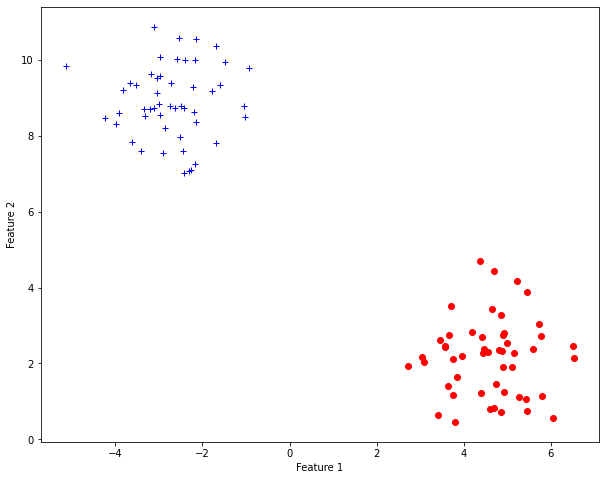

In [257]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=100,n_features=2, centers=2, random_state=42, shuffle=1)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'b+')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [254]:
np.zeros(X.shape[1])
np.random.random(X.shape[1])

array([0.45360013, 0.02029341])

In [258]:

def predict(X, weight):
  return np.where(np.dot(X, weight) >= 0.0, 1, 0)

def fit(X, y, niter=100, alpha=0.1):
  X = np.concatenate( (np.ones((X.shape[0],1)), X), axis=1)
  weight = np.random.random(X.shape[1])

  for i in range(niter):
     err = 0
     for xi, target in zip(X, y):
        weight += alpha * (target - predict(xi, weight)) * xi
  return weight

w = fit(X,y)
# print (w)
# X = np.concatenate( (np.ones((X.shape[0],1)), X), axis=1)
# print (predict(X, w))
# print (y)
w

array([ 0.21313539,  0.96752865, -0.84990543])

In [265]:
random_elements = np.random.choice(X.shape[0], size=5, replace=False)
X_test = X[random_elements, :]
X_test

array([[-2.14780202, 10.55232269],
       [-2.52269485,  7.9565752 ],
       [ 5.72293008,  3.02697174],
       [-2.1475616 ,  8.36916637],
       [-2.44166942,  7.58953794]])

In [266]:
X_test = np.concatenate( (np.ones((X_test.shape[0],1)), X_test), axis=1)
print (predict(X_test, w))
print (y[random_elements])

[0 0 1 0 0]
[0 0 1 0 0]


# Perceptron in PyTorch

In [268]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [272]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1)
        
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
# Use the following for CUDA 
# net = Net().cuda()
print(list(net.parameters()))

[Parameter containing:
tensor([[-0.9303]], requires_grad=True), Parameter containing:
tensor([-0.5642], requires_grad=True)]


In [274]:
input = Variable(torch.randn(1,1,1))
print(input)

tensor([[[0.3227]]])


In [278]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.4)
criterion = nn.MSELoss()

data = [(1,3), (2,6), (3,9), (4,12), (5,15), (6,18)]

for epoch in range(100):
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        X, Y = Variable(torch.FloatTensor([X]), requires_grad=True), Variable(torch.FloatTensor([Y]), requires_grad=False)
        optimizer.zero_grad()
        y_pred = net(X)
        output = criterion(y_pred, Y)
        output.backward()
        optimizer.step()
    if (epoch % 20 == 0.0):
        print("Epoch {} - loss: {}".format(epoch, output))

Epoch 0 - loss: 428.96844482421875
Epoch 20 - loss: 0.023347720503807068
Epoch 40 - loss: 0.015342097729444504
Epoch 60 - loss: 0.013225824572145939
Epoch 80 - loss: 0.01140503492206335


In [281]:
print(list(net.parameters()))

[Parameter containing:
tensor([[2.9437]], requires_grad=True), Parameter containing:
tensor([0.2463], requires_grad=True)]


# Back to Blobs

In [ ]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=100,n_features=2, centers=2, random_state=42, shuffle=1)

In [282]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1)

    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(list(net.parameters()))

[Parameter containing:
tensor([[-0.0052]], requires_grad=True), Parameter containing:
tensor([0.5580], requires_grad=True)]


In [283]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.4)
criterion = nn.MSELoss()

import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.4)
criterion = nn.MSELoss()

for epoch in range(100):
    for i, data2 in enumerate(data):
        X, Y = Variable(torch.FloatTensor([X]), requires_grad=True), Variable(torch.FloatTensor([Y]), requires_grad=False)
        optimizer.zero_grad()
        y_pred = net(X)
        output = criterion(y_pred, Y)
        output.backward()
        optimizer.step()
    if (epoch % 20 == 0.0):
        print("Epoch {} - loss: {}".format(epoch, output))

Epoch 0 - loss: 91.97196197509766
Epoch 20 - loss: 1.4551915228366852e-11
Epoch 40 - loss: 1.4551915228366852e-11
Epoch 60 - loss: 1.4551915228366852e-11
Epoch 80 - loss: 1.4551915228366852e-11
